In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('https://query.data.world/s/dgyj35citerdqk36rou52lgmfhfity',header=None)
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines','Proline']
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
pca = PCA(n_components=None)

In [108]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_test_pca.shape

(54, 13)

In [67]:
var_exp = sorted(pca.explained_variance_,reverse=True)

In [71]:
cum_var = sorted(np.cumsum(pca.explained_variance_),reverse=True)

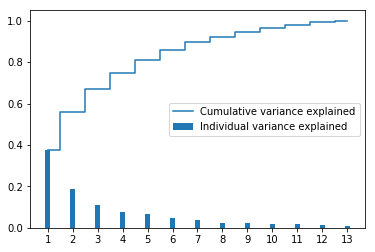

In [78]:
plt.bar(range(1,14),pca.explained_variance_ratio_,width=0.2,label='Individual variance explained',align='center')
plt.step(range(1,14),np.cumsum(pca.explained_variance_ratio_),label='Cumulative variance explained',where='mid')
plt.legend()
plt.xticks(range(1,14))
plt.show()

In [73]:
#Eigen values
pca.explained_variance_

array([ 4.8923083 ,  2.46635032,  1.42809973,  1.01233462,  0.84906459,
        0.60181514,  0.52251546,  0.33051429,  0.29595018,  0.2399553 ,
        0.21432212,  0.16831254,  0.08414846])

In [74]:
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

In [77]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.37329648,  0.56148574,  0.67045365,  0.74769754,  0.81248349,
        0.85840362,  0.89827298,  0.92349212,  0.94607393,  0.96438317,
        0.98073654,  0.99357924,  1.        ])

In [109]:
X_train = np.hstack((X_train_pca[:,0][:,np.newaxis],X_train_pca[:,1][:,np.newaxis]))
X_test = np.hstack((X_test_pca[:,0][:,np.newaxis],X_test_pca[:,1][:,np.newaxis]))

In [110]:
lr = LogisticRegression()

In [111]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
lr.score(X_test,y_test)

0.98148148148148151

In [145]:
def plot_decision_boundry(X,y,estimator):
    markers = ['s','^','*','o','x']
    colors = ['red','green','blue','grey','cyan']
    cmp = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min(),X[:,0].max()
    x2_min,x2_max = X[:,1].min(),X[:,1].max()
    x1,x2 = np.meshgrid(np.arange(x1_min -1,x1_max +1,0.02),np.arange(x2_min -1,x2_max+1,0.02))
    z = estimator.predict(np.array([x1.ravel(),x2.ravel()]).T)
    z = z.reshape(x1.shape)
    plt.contourf(x1,x2,z,alpha=0.3,cmap=cmp)
    for idx,clas in enumerate(np.unique(y)):
        plt.scatter(X[y==clas,0],X[y==clas,1],marker=markers[idx],c=cmp(idx),label=str(clas),alpha=0.5)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(loc='best')
    plt.show()

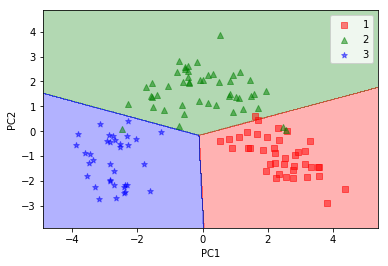

In [146]:
plot_decision_boundry(X_train,y_train,lr)